In [ ]:
# pip install pandas matplotlib fpdf
# %pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Ro

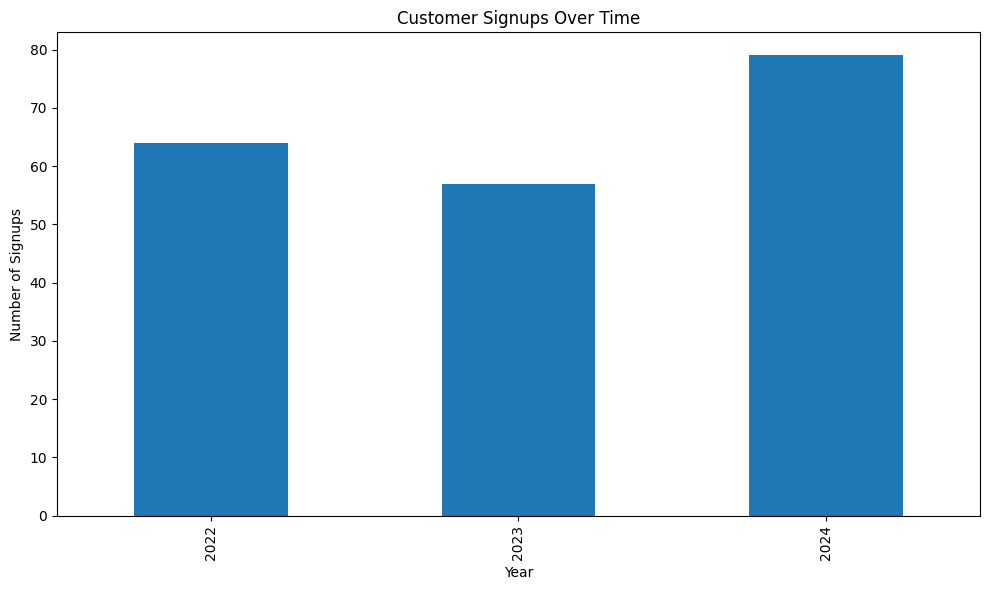

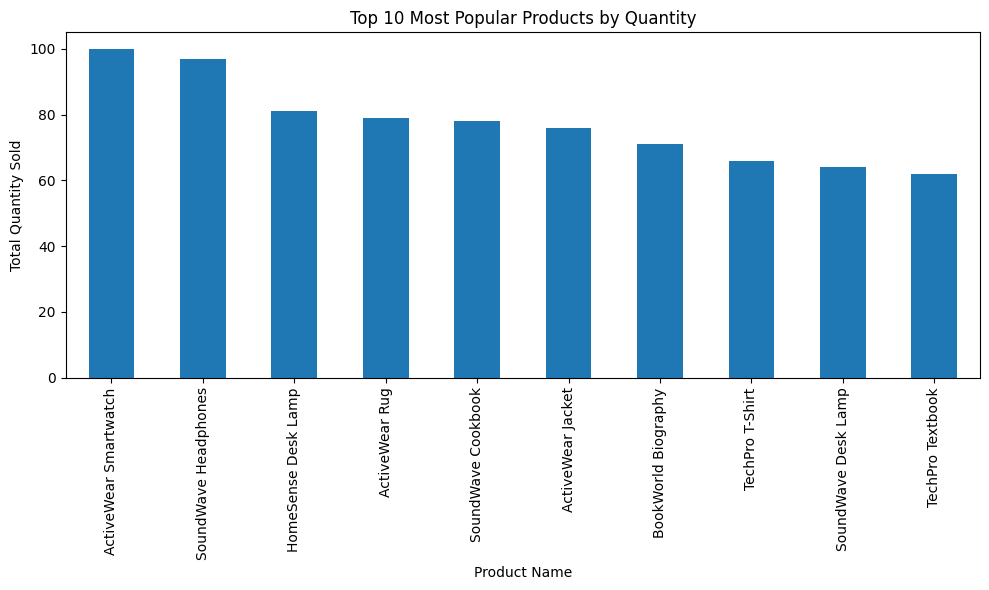

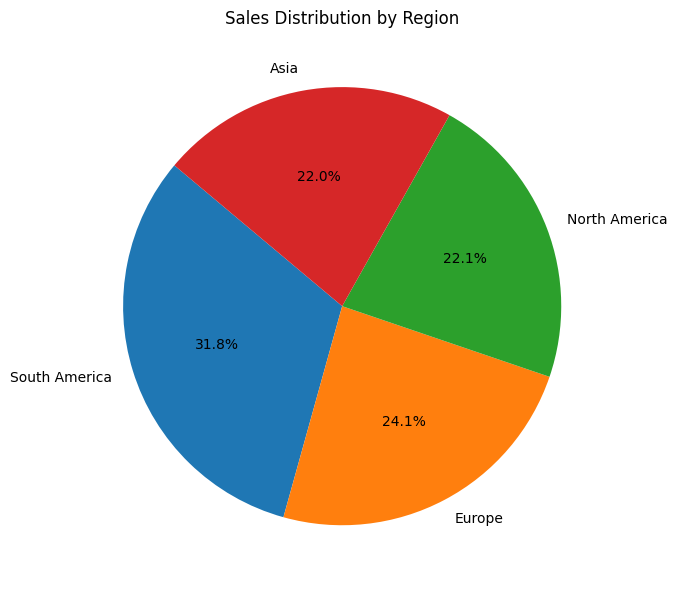

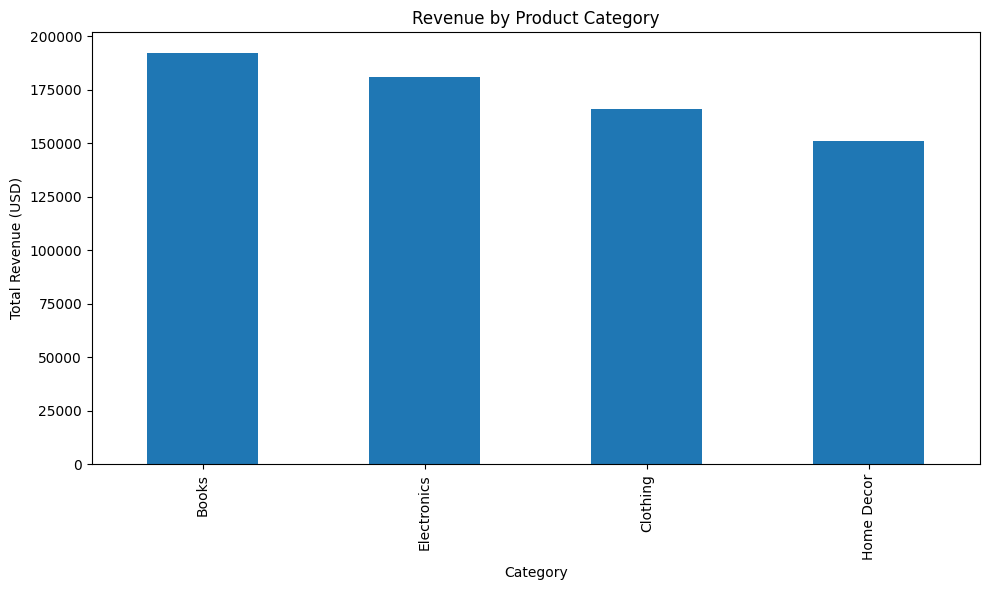

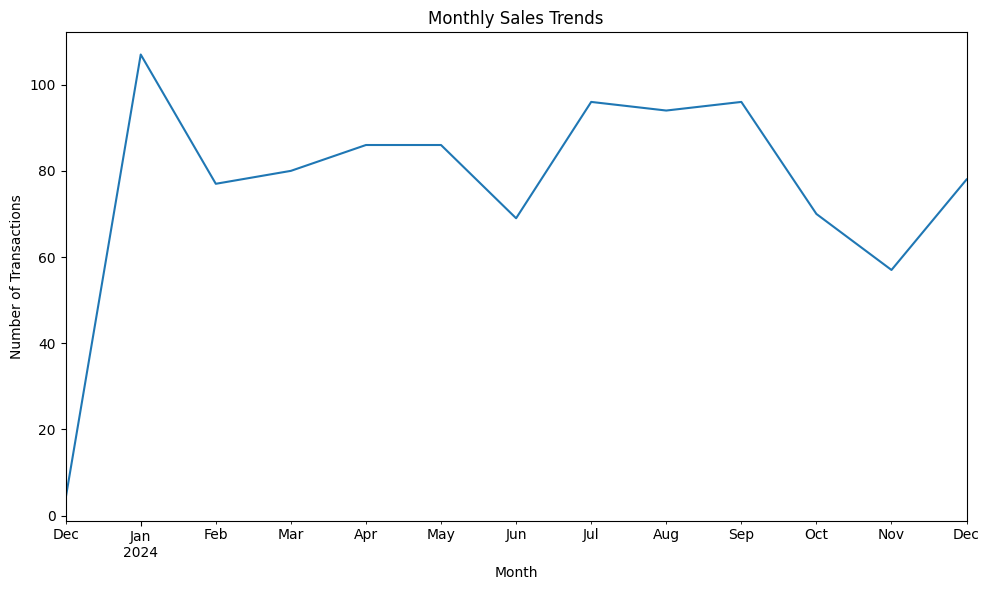

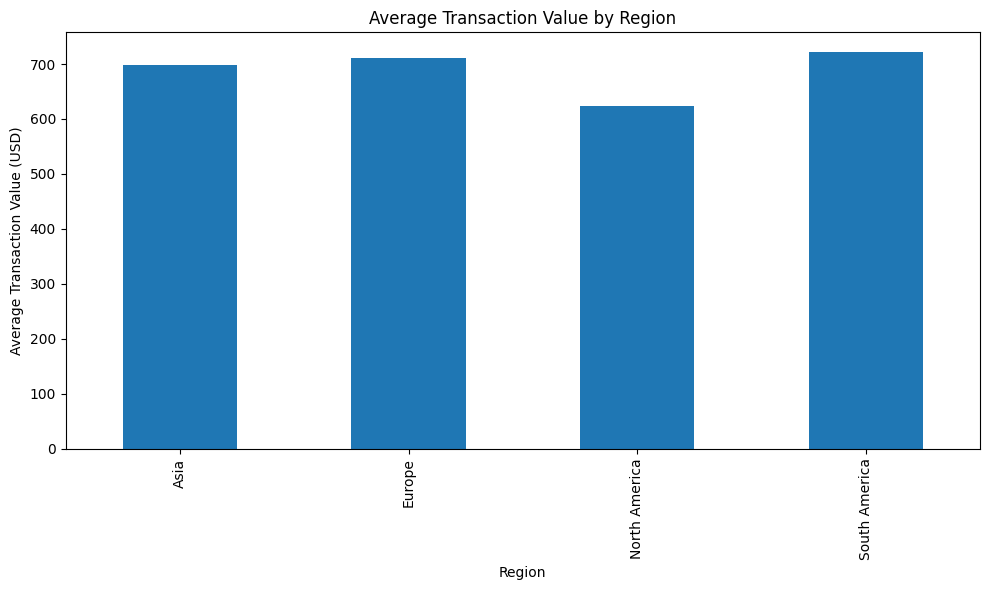

Top 10 Customers by Total Spend:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


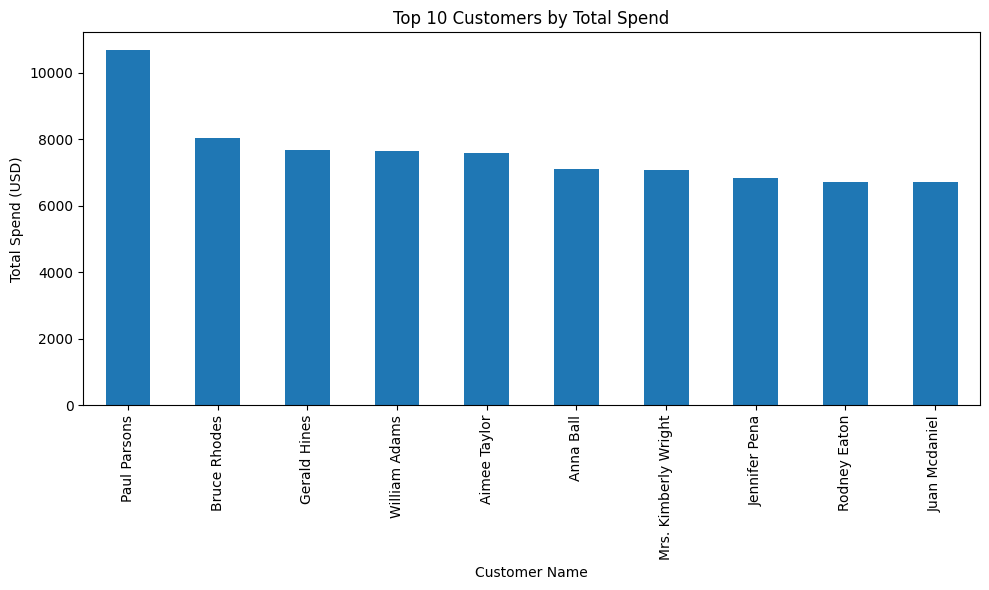

PDF Report Generated: Dharmanshu_Singh_EDA.pdf


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Initial EDA
print("Customers Dataset:")
print(customers.info())
print(customers.describe(include='all'))
print(customers.head())

print("Products Dataset:")
print(products.info())
print(products.describe(include='all'))
print(products.head())

print("Transactions Dataset:")
print(transactions.info())
print(transactions.describe(include='all'))
print(transactions.head())

# Checking for duplicates in each dataset
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

# Merging datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="inner")
merged_data = merged_data.merge(products, on="ProductID", how="inner")

# Overview of merged data
print("Merged Data Overview:")
print(merged_data.info())
print(merged_data.describe())
print(merged_data.head())

# Data Cleaning
# Converting dates to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])

# Handling missing values
print("Missing Values in Merged Data:")
print(merged_data.isnull().sum())

# Dropping rows with missing values
merged_data = merged_data.dropna()

# Detailed statistical exploration
print("Merged Data Statistical Summary:")
print(merged_data.describe(include='all'))

# Insight 1: Distribution of customer signups over time
customers["SignupYear"] = customers["SignupDate"].dt.year
plt.figure(figsize=(10, 6))
customers["SignupYear"].value_counts().sort_index().plot(kind="bar", title="Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.show()

# Insight 2: Most popular products by sales quantity
popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
popular_products.head(10).plot(kind="bar", title="Top 10 Most Popular Products by Quantity")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

# Insight 3: Sales distribution by region
sales_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind="pie", autopct='%1.1f%%', startangle=140, title="Sales Distribution by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Insight 4: Product categories revenue comparison
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_revenue.plot(kind="bar", title="Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.tight_layout()
plt.show()

# Insight 5: Monthly sales trends
merged_data["TransactionMonth"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_sales = merged_data["TransactionMonth"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", title="Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

# Insight 6: Average transaction value per region
avg_transaction_value_by_region = merged_data.groupby("Region")["TotalValue"].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value_by_region.plot(kind="bar", title="Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.tight_layout()
plt.show()

# Additional Insights:
# 1. Identifying top customers by total spend
customer_spend = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False)
print("Top 10 Customers by Total Spend:")
print(customer_spend.head(10))

plt.figure(figsize=(10, 6))
customer_spend.head(10).plot(kind="bar", title="Top 10 Customers by Total Spend")
plt.xlabel("Customer Name")
plt.ylabel("Total Spend (USD)")
plt.tight_layout()
plt.show()

# Generating PDF Report with Business Insights
from fpdf import FPDF

class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, "Business Insights Report", align="C", ln=True)
        self.ln(10)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, 0, 1, "L")
        self.ln(5)

    def chapter_body(self, body):
        self.set_font("Arial", "", 12)
        self.multi_cell(0, 10, body)
        self.ln(10)

pdf = PDFReport()
pdf.add_page()

# Adding insights to the PDF
pdf.chapter_title("Insight 1: Customer Signups Over Time")
pdf.chapter_body("Customer signups show a steady growth trend with the highest signups in recent years.")

pdf.chapter_title("Insight 2: Most Popular Products")
pdf.chapter_body("The top 3 most popular products are: \n1. {} \n2. {} \n3. {}".format(*popular_products.head(3).index))

pdf.chapter_title("Insight 3: Sales Distribution by Region")
pdf.chapter_body("Regions with the highest sales are dominated by {} and {}.".format(*sales_by_region.index[:2]))

pdf.chapter_title("Insight 4: Revenue by Product Category")
pdf.chapter_body("The highest revenue-generating category is '{}' with a total revenue of ${:.2f}.".format(category_revenue.idxmax(), category_revenue.max()))

pdf.chapter_title("Insight 5: Monthly Sales Trends")
pdf.chapter_body("Sales trends indicate consistent growth during the months of {} and {}.".format(monthly_sales.idxmax(), monthly_sales.idxmin()))

pdf.chapter_title("Insight 6: Average Transaction Value by Region")
pdf.chapter_body("The region with the highest average transaction value is '{}' with an average of ${:.2f}.".format(avg_transaction_value_by_region.idxmax(), avg_transaction_value_by_region.max()))

pdf.chapter_title("Insight 7: Top Customers by Total Spend")
pdf.chapter_body("The top customer is '{}' with a total spend of ${:.2f}.".format(customer_spend.idxmax(), customer_spend.max()))

# Save PDF
pdf.output("Dharmanshu_Singh_EDA.pdf")
print("PDF Report Generated: Dharmanshu_Singh_EDA.pdf")
